# Lab Assignment 2

## Austin Booth

Link: 

### Exercise 1

Text(0.5, 1.0, 'Second heater power function u2(t)')

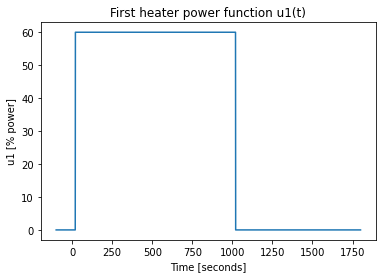

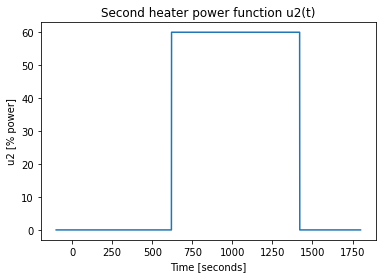

In [7]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# define function to set u1
def u1(t):
    if t <= 20:
        return 0
    elif t <= 1020:
        return 60
    else:
        return 0

# define function to set u2
def u2(t):
    if t <= 620:
        return 0
    elif t <= 1420:
        return 60
    else:
        return 0
    
# plot functions from -100 to 1800 seconds

# create time vector and u1, u2 vectors
t = np.linspace(-100, 1800, 1900)
y1 = np.array([u1(tau) for tau in t]) 
y2 = np.array([u2(tau) for tau in t]) 

# plot u1
fig, ax = plt.subplots(1, 1)
ax.plot(t, y1)
ax.set_xlabel('Time [seconds]')
ax.set_ylabel('u1 [% power]')
ax.set_title('First heater power function u1(t)')

# plot u2
fig, ax = plt.subplots(1, 1)
ax.plot(t, y2)
ax.set_xlabel('Time [seconds]')
ax.set_ylabel('u2 [% power]')
ax.set_title('Second heater power function u2(t)')

### Exercise 2

TCLab version 0.4.9
Arduino Leonardo connected on port COM6 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.


<IPython.core.display.Javascript object>


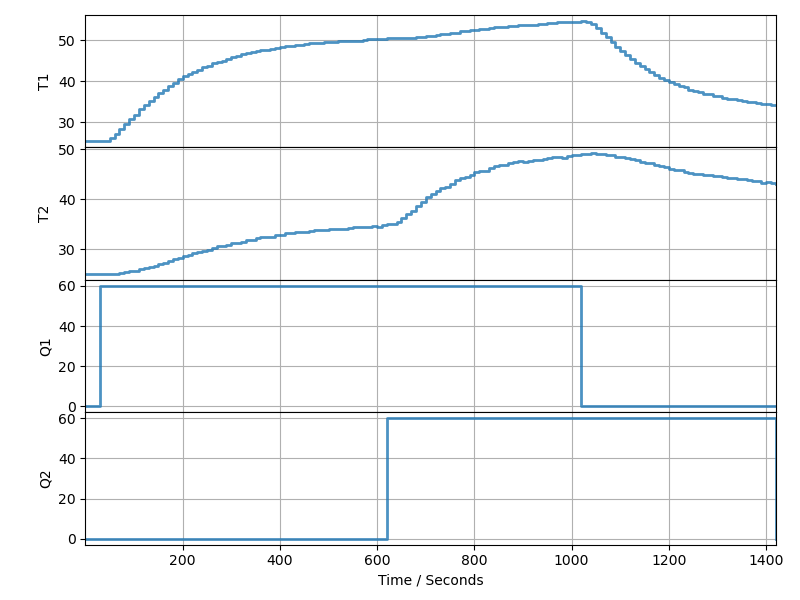

TCLab disconnected successfully.


In [8]:
# import TClab functions and set up
import tclab
%matplotlib notebook
from tclab import TCLab, clock, Historian, Plotter

# use u1 and u2 to set heating behavior and record data
with TCLab() as lab:
    # set P1 and P2 as specified
    lab.P1 = 200
    lab.P2 = 100
    # set up plotter
    h = Historian(lab.sources)
    p = Plotter(h, 1420)
    
    # input u1, u2 functions to heaters
    for t in clock(1420, 10):
        lab.U1 = u1(t)
        lab.U2 = u2(t)
        p.update(t)        

# save data
h.to_csv('lab2data.csv')